# RNN Model with 1 to 6 Layers - ES - No DP

In [26]:
import pandas as pd
import rnn_loop
from processing import preprocessing
from keras.models import load_model

In [2]:
# earlyStopping patience = 50 
# models = 6 
# epochs = 500
# NO DROPOUT

In [3]:
load_processed_df_from_disk = True

if load_processed_df_from_disk:
    # load processed spectoragramms
    data_df = pd.read_json('/datasets/UrbanSound8K/processed/mean_mfcc_data.json')

else:
    # preprocess the raw dataset
    data_df = preprocessing.load_dataset()
    data_df['feature'] = data_df['feature'].apply(preprocessing.calculate_mean_mfcc, preprocessing.DEFAULT_SAMPLE_RATE)

data_df = preprocessing.filter_mfccs(data_df)

X_train, X_test, y_train, y_test = preprocessing.create_training_data_RNN(data_df)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
num_outputs = data_df['label'].unique().shape[0]  # labels = 10

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("num_outputs: ", num_outputs)

X_train shape: (5861, 173, 40)
X_test shape: (1466, 173, 40)
y_train shape: (5861, 10)
y_test shape: (1466, 10)
num_outputs:  10


In [5]:
model = rnn_loop.RNN_loop(num_outputs, num_models=6, DP_rate=1.0)  # DP_rate=1.0 corresponds to no dropout

In [6]:
model.build_RNN_model()

{'model_1': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fd0e7d122b0>,
 'model_2': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fcf8672d710>,
 'model_3': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fcf8d3fbb70>,
 'model_4': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fcf9a77e9b0>,
 'model_5': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fcfc207a748>,
 'model_6': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fcfa121ac18>}

In [7]:
model.initialize(X_test, y_test)

 SUMMARY FOR MODEL  1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
46/46 [==============================] - 0s 8ms/step - loss: 2.4518 - accuracy: 0.1221
Pre-training accuracy: 12.2101%

 SUMMARY FOR MODEL  2
Model: "sequential_1"
________________________________________________________________

In [8]:
histories, durations = model.train(X_train, X_test, y_train, y_test, num_epochs=1000, batch_size=256)

Training for model  1  has started.
Epoch 1/1000
22/23 [===========================>..] - ETA: 0s - loss: 2.2000 - accuracy: 0.2099
Epoch 00001: val_loss improved from inf to 2.05341, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 35ms/step - loss: 2.1938 - accuracy: 0.2119 - val_loss: 2.0534 - val_accuracy: 0.2797
Epoch 2/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.9481 - accuracy: 0.3056
Epoch 00002: val_loss improved from 2.05341 to 1.83146, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 21ms/step - loss: 1.9435 - accuracy: 0.3078 - val_loss: 1.8315 - val_accuracy: 0.3854
Epoch 3/1000
23/23 [==============================] - ETA: 0s - loss: 1.7472 - accuracy: 0.3970
Epoch 00003: val_loss improved from 1.83146 to 1.62392, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 21ms/step - loss: 1.7472 - a

22/23 [===========================>..] - ETA: 0s - loss: 0.3727 - accuracy: 0.8833
Epoch 00025: val_loss improved from 0.55819 to 0.52732, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.3723 - accuracy: 0.8836 - val_loss: 0.5273 - val_accuracy: 0.8199
Epoch 26/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3355 - accuracy: 0.8924
Epoch 00026: val_loss improved from 0.52732 to 0.50073, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.3340 - accuracy: 0.8930 - val_loss: 0.5007 - val_accuracy: 0.8349
Epoch 27/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3536 - accuracy: 0.8857
Epoch 00027: val_loss did not improve from 0.50073
23/23 [==============================] - 1s 25ms/step - loss: 0.3510 - accuracy: 0.8867 - val_loss: 0.5139 - val_accuracy: 0.8302
Epoch 28/1000
22/23 [===========================>.

Epoch 52/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1416 - accuracy: 0.9524
Epoch 00052: val_loss did not improve from 0.40611
23/23 [==============================] - 1s 25ms/step - loss: 0.1427 - accuracy: 0.9524 - val_loss: 0.4503 - val_accuracy: 0.8608
Epoch 53/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1450 - accuracy: 0.9490
Epoch 00053: val_loss did not improve from 0.40611
23/23 [==============================] - 1s 25ms/step - loss: 0.1464 - accuracy: 0.9483 - val_loss: 0.4509 - val_accuracy: 0.8656
Epoch 54/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1352 - accuracy: 0.9581
Epoch 00054: val_loss did not improve from 0.40611
23/23 [==============================] - 1s 25ms/step - loss: 0.1357 - accuracy: 0.9585 - val_loss: 0.4135 - val_accuracy: 0.8888
Epoch 55/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1363 - accuracy: 0.9574
Epoch 00055: val_loss did not improve from 0.40611
23/23 [===========

22/23 [===========================>..] - ETA: 0s - loss: 0.0664 - accuracy: 0.9789
Epoch 00081: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 24ms/step - loss: 0.0668 - accuracy: 0.9780 - val_loss: 0.4527 - val_accuracy: 0.8840
Epoch 82/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0600 - accuracy: 0.9805
Epoch 00082: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 25ms/step - loss: 0.0612 - accuracy: 0.9802 - val_loss: 0.4800 - val_accuracy: 0.8752
Epoch 83/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1024 - accuracy: 0.9666
Epoch 00083: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 25ms/step - loss: 0.1007 - accuracy: 0.9671 - val_loss: 0.4811 - val_accuracy: 0.8745
Epoch 84/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0731 - accuracy: 0.9780
Epoch 00084: val_loss did not improve from 0.40129
23/23 [=========================

Epoch 111/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0361 - accuracy: 0.9886
Epoch 00111: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 24ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.5060 - val_accuracy: 0.8970
Epoch 112/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0369 - accuracy: 0.9913
Epoch 00112: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 24ms/step - loss: 0.0380 - accuracy: 0.9906 - val_loss: 0.5449 - val_accuracy: 0.8765
Epoch 113/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0451 - accuracy: 0.9862
Epoch 00113: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 25ms/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.5161 - val_accuracy: 0.8854
Epoch 114/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0412 - accuracy: 0.9874
Epoch 00114: val_loss did not improve from 0.40129
23/23 [=======

Epoch 141/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0454 - accuracy: 0.9858
Epoch 00141: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 25ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.4846 - val_accuracy: 0.8847
Epoch 142/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0359 - accuracy: 0.9881
Epoch 00142: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 25ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.4962 - val_accuracy: 0.8888
Epoch 143/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0340 - accuracy: 0.9901
Epoch 00143: val_loss did not improve from 0.40129
23/23 [==============================] - 1s 24ms/step - loss: 0.0340 - accuracy: 0.9903 - val_loss: 0.5136 - val_accuracy: 0.8738
Epoch 144/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0393 - accuracy: 0.9858
Epoch 00144: val_loss did not improve from 0.40129
23/23 [=======

Epoch 20/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4051 - accuracy: 0.8588
Epoch 00020: val_loss improved from 0.62767 to 0.61051, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.4072 - accuracy: 0.8586 - val_loss: 0.6105 - val_accuracy: 0.7865
Epoch 21/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4020 - accuracy: 0.8601
Epoch 00021: val_loss did not improve from 0.61051
23/23 [==============================] - 1s 24ms/step - loss: 0.4004 - accuracy: 0.8606 - val_loss: 0.6187 - val_accuracy: 0.7981
Epoch 22/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3812 - accuracy: 0.8638
Epoch 00022: val_loss did not improve from 0.61051
23/23 [==============================] - 1s 25ms/step - loss: 0.3801 - accuracy: 0.8633 - val_loss: 0.6133 - val_accuracy: 0.7981
Epoch 23/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3695 - accuracy: 0.8723
Epoc

Epoch 48/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2129 - accuracy: 0.9226
Epoch 00048: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 25ms/step - loss: 0.2120 - accuracy: 0.9225 - val_loss: 0.5966 - val_accuracy: 0.8226
Epoch 49/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2102 - accuracy: 0.9231
Epoch 00049: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 24ms/step - loss: 0.2088 - accuracy: 0.9234 - val_loss: 0.5791 - val_accuracy: 0.8247
Epoch 50/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1903 - accuracy: 0.9347
Epoch 00050: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 24ms/step - loss: 0.1899 - accuracy: 0.9345 - val_loss: 0.5697 - val_accuracy: 0.8315
Epoch 51/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1758 - accuracy: 0.9384
Epoch 00051: val_loss did not improve from 0.54287
23/23 [===========

Epoch 78/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1201 - accuracy: 0.9586
Epoch 00078: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 23ms/step - loss: 0.1187 - accuracy: 0.9591 - val_loss: 0.5776 - val_accuracy: 0.8438
Epoch 79/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1210 - accuracy: 0.9586
Epoch 00079: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 24ms/step - loss: 0.1217 - accuracy: 0.9591 - val_loss: 0.5917 - val_accuracy: 0.8424
Epoch 80/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1147 - accuracy: 0.9629
Epoch 00080: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 25ms/step - loss: 0.1132 - accuracy: 0.9633 - val_loss: 0.5930 - val_accuracy: 0.8445
Epoch 81/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1209 - accuracy: 0.9553
Epoch 00081: val_loss did not improve from 0.54287
23/23 [===========

Epoch 108/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0824 - accuracy: 0.9698
Epoch 00108: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 25ms/step - loss: 0.0831 - accuracy: 0.9691 - val_loss: 0.6257 - val_accuracy: 0.8452
Epoch 109/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0780 - accuracy: 0.9735
Epoch 00109: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 25ms/step - loss: 0.0783 - accuracy: 0.9734 - val_loss: 0.6488 - val_accuracy: 0.8492
Epoch 110/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0915 - accuracy: 0.9670
Epoch 00110: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 25ms/step - loss: 0.0900 - accuracy: 0.9676 - val_loss: 0.6456 - val_accuracy: 0.8390
Epoch 111/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0912 - accuracy: 0.9707
Epoch 00111: val_loss did not improve from 0.54287
23/23 [=======

Epoch 138/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0685 - accuracy: 0.9760
Epoch 00138: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 25ms/step - loss: 0.0690 - accuracy: 0.9753 - val_loss: 0.6165 - val_accuracy: 0.8574
Epoch 139/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0656 - accuracy: 0.9782
Epoch 00139: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 24ms/step - loss: 0.0647 - accuracy: 0.9783 - val_loss: 0.6849 - val_accuracy: 0.8540
Epoch 140/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0703 - accuracy: 0.9744
Epoch 00140: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 23ms/step - loss: 0.0704 - accuracy: 0.9741 - val_loss: 0.6655 - val_accuracy: 0.8397
Epoch 141/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0753 - accuracy: 0.9746
Epoch 00141: val_loss did not improve from 0.54287
23/23 [=======

Epoch 168/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.0487 - accuracy: 0.9820
Epoch 00168: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 25ms/step - loss: 0.0480 - accuracy: 0.9824 - val_loss: 0.6939 - val_accuracy: 0.8506
Epoch 169/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0642 - accuracy: 0.9780
Epoch 00169: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 24ms/step - loss: 0.0628 - accuracy: 0.9785 - val_loss: 0.7361 - val_accuracy: 0.8492
Epoch 170/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0544 - accuracy: 0.9801
Epoch 00170: val_loss did not improve from 0.54287
23/23 [==============================] - 1s 25ms/step - loss: 0.0544 - accuracy: 0.9799 - val_loss: 0.6602 - val_accuracy: 0.8506
Epoch 171/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0522 - accuracy: 0.9808
Epoch 00171: val_loss did not improve from 0.54287
23/23 [=======

22/23 [===========================>..] - ETA: 0s - loss: 0.4556 - accuracy: 0.8418
Epoch 00020: val_loss improved from 0.68441 to 0.66855, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.4615 - accuracy: 0.8391 - val_loss: 0.6685 - val_accuracy: 0.7810
Epoch 21/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4220 - accuracy: 0.8494
Epoch 00021: val_loss improved from 0.66855 to 0.66064, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.4211 - accuracy: 0.8504 - val_loss: 0.6606 - val_accuracy: 0.7797
Epoch 22/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.4303 - accuracy: 0.8491
Epoch 00022: val_loss improved from 0.66064 to 0.66000, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.4302 - accuracy: 0.8485 - val_loss: 0.6600 - val_ac

22/23 [===========================>..] - ETA: 0s - loss: 0.2082 - accuracy: 0.9258
Epoch 00048: val_loss improved from 0.60907 to 0.60623, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.2077 - accuracy: 0.9261 - val_loss: 0.6062 - val_accuracy: 0.8213
Epoch 49/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2193 - accuracy: 0.9205
Epoch 00049: val_loss did not improve from 0.60623
23/23 [==============================] - 1s 25ms/step - loss: 0.2214 - accuracy: 0.9195 - val_loss: 0.6519 - val_accuracy: 0.8206
Epoch 50/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2189 - accuracy: 0.9219
Epoch 00050: val_loss did not improve from 0.60623
23/23 [==============================] - 1s 26ms/step - loss: 0.2190 - accuracy: 0.9215 - val_loss: 0.6117 - val_accuracy: 0.8247
Epoch 51/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2252 - accuracy: 0.9155
Epoch 00051: val_l

22/23 [===========================>..] - ETA: 0s - loss: 0.1365 - accuracy: 0.9521
Epoch 00077: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 24ms/step - loss: 0.1361 - accuracy: 0.9519 - val_loss: 0.6469 - val_accuracy: 0.8254
Epoch 78/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1383 - accuracy: 0.9505
Epoch 00078: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.1406 - accuracy: 0.9493 - val_loss: 0.6323 - val_accuracy: 0.8295
Epoch 79/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1354 - accuracy: 0.9528
Epoch 00079: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.1361 - accuracy: 0.9527 - val_loss: 0.6648 - val_accuracy: 0.8247
Epoch 80/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1318 - accuracy: 0.9524
Epoch 00080: val_loss did not improve from 0.59146
23/23 [=========================

Epoch 107/1000
23/23 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9623
Epoch 00107: val_loss did not improve from 0.59146
23/23 [==============================] - 0s 21ms/step - loss: 0.1018 - accuracy: 0.9623 - val_loss: 0.6682 - val_accuracy: 0.8302
Epoch 108/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1039 - accuracy: 0.9652
Epoch 00108: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 22ms/step - loss: 0.1053 - accuracy: 0.9647 - val_loss: 0.6517 - val_accuracy: 0.8363
Epoch 109/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1047 - accuracy: 0.9613
Epoch 00109: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 24ms/step - loss: 0.1046 - accuracy: 0.9613 - val_loss: 0.6613 - val_accuracy: 0.8349
Epoch 110/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0946 - accuracy: 0.9689
Epoch 00110: val_loss did not improve from 0.59146
23/23 [=======

Epoch 137/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0816 - accuracy: 0.9709
Epoch 00137: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 24ms/step - loss: 0.0830 - accuracy: 0.9703 - val_loss: 0.6619 - val_accuracy: 0.8486
Epoch 138/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0838 - accuracy: 0.9711
Epoch 00138: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 24ms/step - loss: 0.0848 - accuracy: 0.9703 - val_loss: 0.7019 - val_accuracy: 0.8506
Epoch 139/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0873 - accuracy: 0.9688
Epoch 00139: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0865 - accuracy: 0.9693 - val_loss: 0.6976 - val_accuracy: 0.8363
Epoch 140/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0844 - accuracy: 0.9691
Epoch 00140: val_loss did not improve from 0.59146
23/23 [=======

Epoch 167/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0668 - accuracy: 0.9753
Epoch 00167: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 26ms/step - loss: 0.0670 - accuracy: 0.9756 - val_loss: 0.6883 - val_accuracy: 0.8540
Epoch 168/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0827 - accuracy: 0.9735
Epoch 00168: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 26ms/step - loss: 0.0814 - accuracy: 0.9742 - val_loss: 0.7293 - val_accuracy: 0.8383
Epoch 169/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0870 - accuracy: 0.9737
Epoch 00169: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0877 - accuracy: 0.9736 - val_loss: 0.7062 - val_accuracy: 0.8465
Epoch 170/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0674 - accuracy: 0.9764
Epoch 00170: val_loss did not improve from 0.59146
23/23 [=======

Epoch 197/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0573 - accuracy: 0.9808
Epoch 00197: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0589 - accuracy: 0.9804 - val_loss: 0.7155 - val_accuracy: 0.8561
Epoch 198/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0561 - accuracy: 0.9799
Epoch 00198: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.7237 - val_accuracy: 0.8486
Epoch 199/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0619 - accuracy: 0.9778
Epoch 00199: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0618 - accuracy: 0.9778 - val_loss: 0.7694 - val_accuracy: 0.8431
Epoch 200/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0573 - accuracy: 0.9815
Epoch 00200: val_loss did not improve from 0.59146
23/23 [=======

Epoch 227/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0516 - accuracy: 0.9815
Epoch 00227: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0534 - accuracy: 0.9807 - val_loss: 0.7291 - val_accuracy: 0.8554
Epoch 228/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0539 - accuracy: 0.9835
Epoch 00228: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 24ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.7056 - val_accuracy: 0.8608
Epoch 229/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0520 - accuracy: 0.9824
Epoch 00229: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0530 - accuracy: 0.9823 - val_loss: 0.7527 - val_accuracy: 0.8479
Epoch 230/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0445 - accuracy: 0.9838
Epoch 00230: val_loss did not improve from 0.59146
23/23 [=======

Epoch 257/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0420 - accuracy: 0.9858
Epoch 00257: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.7442 - val_accuracy: 0.8581
Epoch 258/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0468 - accuracy: 0.9826
Epoch 00258: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0458 - accuracy: 0.9829 - val_loss: 0.7505 - val_accuracy: 0.8588
Epoch 259/1000
23/23 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9846
Epoch 00259: val_loss did not improve from 0.59146
23/23 [==============================] - 1s 25ms/step - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.7551 - val_accuracy: 0.8513
Epoch 260/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0474 - accuracy: 0.9838
Epoch 00260: val_loss did not improve from 0.59146
23/23 [=======

Epoch 21/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3748 - accuracy: 0.8697
Epoch 00021: val_loss did not improve from 0.54857
23/23 [==============================] - 1s 25ms/step - loss: 0.3750 - accuracy: 0.8696 - val_loss: 0.5563 - val_accuracy: 0.8165
Epoch 22/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3415 - accuracy: 0.8796
Epoch 00022: val_loss improved from 0.54857 to 0.53124, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.3397 - accuracy: 0.8801 - val_loss: 0.5312 - val_accuracy: 0.8240
Epoch 23/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3284 - accuracy: 0.8816
Epoch 00023: val_loss did not improve from 0.53124
23/23 [==============================] - 1s 24ms/step - loss: 0.3292 - accuracy: 0.8814 - val_loss: 0.5318 - val_accuracy: 0.8261
Epoch 24/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.3254 - accuracy: 0.8846
Epoc

23/23 [==============================] - ETA: 0s - loss: 0.1702 - accuracy: 0.9425
Epoch 00049: val_loss did not improve from 0.47287
23/23 [==============================] - 0s 22ms/step - loss: 0.1702 - accuracy: 0.9425 - val_loss: 0.4909 - val_accuracy: 0.8574
Epoch 50/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1610 - accuracy: 0.9437
Epoch 00050: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.1607 - accuracy: 0.9440 - val_loss: 0.5359 - val_accuracy: 0.8397
Epoch 51/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1643 - accuracy: 0.9405
Epoch 00051: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 24ms/step - loss: 0.1641 - accuracy: 0.9403 - val_loss: 0.5286 - val_accuracy: 0.8547
Epoch 52/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1552 - accuracy: 0.9471
Epoch 00052: val_loss did not improve from 0.47287
23/23 [=========================

Epoch 79/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1041 - accuracy: 0.9632
Epoch 00079: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.1058 - accuracy: 0.9630 - val_loss: 0.5386 - val_accuracy: 0.8649
Epoch 80/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1102 - accuracy: 0.9606
Epoch 00080: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 24ms/step - loss: 0.1121 - accuracy: 0.9596 - val_loss: 0.5654 - val_accuracy: 0.8547
Epoch 81/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1100 - accuracy: 0.9624
Epoch 00081: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 26ms/step - loss: 0.1109 - accuracy: 0.9625 - val_loss: 0.5401 - val_accuracy: 0.8636
Epoch 82/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1072 - accuracy: 0.9618
Epoch 00082: val_loss did not improve from 0.47287
23/23 [===========

Epoch 109/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.0855 - accuracy: 0.9723
Epoch 00109: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0847 - accuracy: 0.9725 - val_loss: 0.5277 - val_accuracy: 0.8711
Epoch 110/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0704 - accuracy: 0.9760
Epoch 00110: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0691 - accuracy: 0.9763 - val_loss: 0.5222 - val_accuracy: 0.8731
Epoch 111/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0743 - accuracy: 0.9751
Epoch 00111: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0727 - accuracy: 0.9759 - val_loss: 0.5329 - val_accuracy: 0.8704
Epoch 112/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.9730
Epoch 00112: val_loss did not improve from 0.47287
23/23 [=======

Epoch 139/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0675 - accuracy: 0.9746
Epoch 00139: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0667 - accuracy: 0.9751 - val_loss: 0.5744 - val_accuracy: 0.8663
Epoch 140/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0666 - accuracy: 0.9769
Epoch 00140: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0661 - accuracy: 0.9770 - val_loss: 0.5544 - val_accuracy: 0.8731
Epoch 141/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0598 - accuracy: 0.9796
Epoch 00141: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 24ms/step - loss: 0.0594 - accuracy: 0.9797 - val_loss: 0.5587 - val_accuracy: 0.8690
Epoch 142/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0639 - accuracy: 0.9787
Epoch 00142: val_loss did not improve from 0.47287
23/23 [=======

Epoch 169/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0662 - accuracy: 0.9783
Epoch 00169: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 24ms/step - loss: 0.0677 - accuracy: 0.9780 - val_loss: 0.5718 - val_accuracy: 0.8738
Epoch 170/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0678 - accuracy: 0.9769
Epoch 00170: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 24ms/step - loss: 0.0678 - accuracy: 0.9771 - val_loss: 0.5681 - val_accuracy: 0.8724
Epoch 171/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0543 - accuracy: 0.9798
Epoch 00171: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0541 - accuracy: 0.9800 - val_loss: 0.5545 - val_accuracy: 0.8738
Epoch 172/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0571 - accuracy: 0.9789
Epoch 00172: val_loss did not improve from 0.47287
23/23 [=======

Epoch 199/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0497 - accuracy: 0.9854
Epoch 00199: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 26ms/step - loss: 0.0506 - accuracy: 0.9853 - val_loss: 0.6220 - val_accuracy: 0.8697
Epoch 200/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0442 - accuracy: 0.9835
Epoch 00200: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0435 - accuracy: 0.9838 - val_loss: 0.6583 - val_accuracy: 0.8649
Epoch 201/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0478 - accuracy: 0.9849
Epoch 00201: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.6480 - val_accuracy: 0.8711
Epoch 202/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0507 - accuracy: 0.9831
Epoch 00202: val_loss did not improve from 0.47287
23/23 [=======

Epoch 229/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0424 - accuracy: 0.9860
Epoch 00229: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 26ms/step - loss: 0.0415 - accuracy: 0.9862 - val_loss: 0.6104 - val_accuracy: 0.8731
Epoch 230/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0374 - accuracy: 0.9886
Epoch 00230: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 26ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.6410 - val_accuracy: 0.8745
Epoch 231/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0400 - accuracy: 0.9865
Epoch 00231: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 24ms/step - loss: 0.0396 - accuracy: 0.9865 - val_loss: 0.6229 - val_accuracy: 0.8738
Epoch 232/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0401 - accuracy: 0.9860
Epoch 00232: val_loss did not improve from 0.47287
23/23 [=======

Epoch 259/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0472 - accuracy: 0.9837
Epoch 00259: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 24ms/step - loss: 0.0459 - accuracy: 0.9841 - val_loss: 0.6042 - val_accuracy: 0.8786
Epoch 260/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0453 - accuracy: 0.9856
Epoch 00260: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.6343 - val_accuracy: 0.8731
Epoch 261/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0318 - accuracy: 0.9909
Epoch 00261: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0313 - accuracy: 0.9910 - val_loss: 0.6289 - val_accuracy: 0.8738
Epoch 262/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0400 - accuracy: 0.9867
Epoch 00262: val_loss did not improve from 0.47287
23/23 [=======

Epoch 289/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0379 - accuracy: 0.9876
Epoch 00289: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 25ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.7221 - val_accuracy: 0.8663
Epoch 290/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0436 - accuracy: 0.9858
Epoch 00290: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 26ms/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.6330 - val_accuracy: 0.8820
Epoch 291/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0420 - accuracy: 0.9860
Epoch 00291: val_loss did not improve from 0.47287
23/23 [==============================] - 1s 24ms/step - loss: 0.0420 - accuracy: 0.9858 - val_loss: 0.6077 - val_accuracy: 0.8724
Epoch 292/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0467 - accuracy: 0.9851
Epoch 00292: val_loss did not improve from 0.47287
23/23 [=======

23/23 [==============================] - 1s 22ms/step - loss: 1.2578 - accuracy: 0.5579 - val_loss: 1.1649 - val_accuracy: 0.5846
Epoch 4/1000
23/23 [==============================] - ETA: 0s - loss: 1.0896 - accuracy: 0.6233
Epoch 00004: val_loss improved from 1.16490 to 1.06955, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 20ms/step - loss: 1.0896 - accuracy: 0.6233 - val_loss: 1.0695 - val_accuracy: 0.6419
Epoch 5/1000
23/23 [==============================] - ETA: 0s - loss: 0.9775 - accuracy: 0.6714
Epoch 00005: val_loss improved from 1.06955 to 0.96130, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.9775 - accuracy: 0.6714 - val_loss: 0.9613 - val_accuracy: 0.6705
Epoch 6/1000
23/23 [==============================] - ETA: 0s - loss: 0.8832 - accuracy: 0.6961
Epoch 00006: val_loss improved from 0.96130 to 0.93180, saving model to models/saved_model

Epoch 30/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2735 - accuracy: 0.9043
Epoch 00030: val_loss improved from 0.62845 to 0.62343, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.2737 - accuracy: 0.9041 - val_loss: 0.6234 - val_accuracy: 0.8172
Epoch 31/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2606 - accuracy: 0.9116
Epoch 00031: val_loss improved from 0.62343 to 0.61117, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.2585 - accuracy: 0.9118 - val_loss: 0.6112 - val_accuracy: 0.8192
Epoch 32/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2523 - accuracy: 0.9114
Epoch 00032: val_loss did not improve from 0.61117
23/23 [==============================] - 1s 24ms/step - loss: 0.2525 - accuracy: 0.9109 - val_loss: 0.6583 - val_accuracy: 0.8192
Epoch 33/1000
22/23 [===============

Epoch 59/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1589 - accuracy: 0.9451
Epoch 00059: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 26ms/step - loss: 0.1572 - accuracy: 0.9454 - val_loss: 0.6786 - val_accuracy: 0.8342
Epoch 60/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1580 - accuracy: 0.9455
Epoch 00060: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 26ms/step - loss: 0.1599 - accuracy: 0.9451 - val_loss: 0.6280 - val_accuracy: 0.8465
Epoch 61/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1374 - accuracy: 0.9506
Epoch 00061: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 24ms/step - loss: 0.1373 - accuracy: 0.9505 - val_loss: 0.6506 - val_accuracy: 0.8390
Epoch 62/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1296 - accuracy: 0.9537
Epoch 00062: val_loss did not improve from 0.60544
23/23 [===========

Epoch 89/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0977 - accuracy: 0.9679
Epoch 00089: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 25ms/step - loss: 0.0958 - accuracy: 0.9686 - val_loss: 0.6911 - val_accuracy: 0.8363
Epoch 90/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1107 - accuracy: 0.9620
Epoch 00090: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 26ms/step - loss: 0.1117 - accuracy: 0.9616 - val_loss: 0.6165 - val_accuracy: 0.8452
Epoch 91/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0856 - accuracy: 0.9707
Epoch 00091: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 26ms/step - loss: 0.0858 - accuracy: 0.9701 - val_loss: 0.6959 - val_accuracy: 0.8472
Epoch 92/1000
21/23 [==========================>...] - ETA: 0s - loss: 0.0917 - accuracy: 0.9689
Epoch 00092: val_loss did not improve from 0.60544
23/23 [===========

Epoch 119/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0847 - accuracy: 0.9737
Epoch 00119: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 25ms/step - loss: 0.0852 - accuracy: 0.9736 - val_loss: 0.6759 - val_accuracy: 0.8540
Epoch 120/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0907 - accuracy: 0.9693
Epoch 00120: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 25ms/step - loss: 0.0901 - accuracy: 0.9693 - val_loss: 0.6780 - val_accuracy: 0.8554
Epoch 121/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0762 - accuracy: 0.9741
Epoch 00121: val_loss did not improve from 0.60544
23/23 [==============================] - 0s 21ms/step - loss: 0.0757 - accuracy: 0.9741 - val_loss: 0.6971 - val_accuracy: 0.8568
Epoch 122/1000
23/23 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9790
Epoch 00122: val_loss did not improve from 0.60544
23/23 [=======

Epoch 149/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0645 - accuracy: 0.9783
Epoch 00149: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 24ms/step - loss: 0.0639 - accuracy: 0.9785 - val_loss: 0.7173 - val_accuracy: 0.8561
Epoch 150/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0648 - accuracy: 0.9780
Epoch 00150: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 25ms/step - loss: 0.0640 - accuracy: 0.9780 - val_loss: 0.6957 - val_accuracy: 0.8608
Epoch 151/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0673 - accuracy: 0.9769
Epoch 00151: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 25ms/step - loss: 0.0678 - accuracy: 0.9763 - val_loss: 0.6861 - val_accuracy: 0.8649
Epoch 152/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0682 - accuracy: 0.9769
Epoch 00152: val_loss did not improve from 0.60544
23/23 [=======

Epoch 179/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0592 - accuracy: 0.9792
Epoch 00179: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 25ms/step - loss: 0.0600 - accuracy: 0.9790 - val_loss: 0.7273 - val_accuracy: 0.8574
Epoch 180/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0571 - accuracy: 0.9828
Epoch 00180: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 25ms/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.7303 - val_accuracy: 0.8574
Epoch 181/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0620 - accuracy: 0.9764
Epoch 00181: val_loss did not improve from 0.60544
23/23 [==============================] - 1s 24ms/step - loss: 0.0625 - accuracy: 0.9766 - val_loss: 0.7127 - val_accuracy: 0.8615
Epoch 182/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0708 - accuracy: 0.9776
Epoch 00182: val_loss did not improve from 0.60544
23/23 [=======

Epoch 2/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.5199 - accuracy: 0.4379
Epoch 00002: val_loss improved from 1.67273 to 1.35791, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.5135 - accuracy: 0.4397 - val_loss: 1.3579 - val_accuracy: 0.4816
Epoch 3/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.2526 - accuracy: 0.5481
Epoch 00003: val_loss improved from 1.35791 to 1.12650, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.2545 - accuracy: 0.5494 - val_loss: 1.1265 - val_accuracy: 0.6132
Epoch 4/1000
22/23 [===========================>..] - ETA: 0s - loss: 1.0943 - accuracy: 0.6177
Epoch 00004: val_loss improved from 1.12650 to 1.00462, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.0931 - accuracy: 0.6182 - val_loss: 1.00

Epoch 28/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2973 - accuracy: 0.8984
Epoch 00028: val_loss did not improve from 0.53613
23/23 [==============================] - 1s 26ms/step - loss: 0.2984 - accuracy: 0.8975 - val_loss: 0.5759 - val_accuracy: 0.8145
Epoch 29/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2665 - accuracy: 0.9068
Epoch 00029: val_loss improved from 0.53613 to 0.52942, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.2649 - accuracy: 0.9084 - val_loss: 0.5294 - val_accuracy: 0.8295
Epoch 30/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2668 - accuracy: 0.9066
Epoch 00030: val_loss did not improve from 0.52942
23/23 [==============================] - 1s 26ms/step - loss: 0.2655 - accuracy: 0.9074 - val_loss: 0.5460 - val_accuracy: 0.8342
Epoch 31/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.2806 - accuracy: 0.9013
Epoc

22/23 [===========================>..] - ETA: 0s - loss: 0.1496 - accuracy: 0.9487
Epoch 00057: val_loss did not improve from 0.51663
23/23 [==============================] - 1s 25ms/step - loss: 0.1482 - accuracy: 0.9488 - val_loss: 0.5472 - val_accuracy: 0.8527
Epoch 58/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1385 - accuracy: 0.9540
Epoch 00058: val_loss improved from 0.51663 to 0.51479, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.1386 - accuracy: 0.9543 - val_loss: 0.5148 - val_accuracy: 0.8636
Epoch 59/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1382 - accuracy: 0.9574
Epoch 00059: val_loss did not improve from 0.51479
23/23 [==============================] - 1s 26ms/step - loss: 0.1362 - accuracy: 0.9580 - val_loss: 0.5544 - val_accuracy: 0.8479
Epoch 60/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1248 - accuracy: 0.9549
Epoch 00060: val_l

Epoch 86/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1136 - accuracy: 0.9638
Epoch 00086: val_loss did not improve from 0.50090
23/23 [==============================] - 1s 24ms/step - loss: 0.1120 - accuracy: 0.9643 - val_loss: 0.5286 - val_accuracy: 0.8772
Epoch 87/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0857 - accuracy: 0.9723
Epoch 00087: val_loss did not improve from 0.50090
23/23 [==============================] - 1s 26ms/step - loss: 0.0848 - accuracy: 0.9724 - val_loss: 0.5334 - val_accuracy: 0.8656
Epoch 88/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0983 - accuracy: 0.9693
Epoch 00088: val_loss did not improve from 0.50090
23/23 [==============================] - 1s 25ms/step - loss: 0.0981 - accuracy: 0.9695 - val_loss: 0.5392 - val_accuracy: 0.8602
Epoch 89/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.1068 - accuracy: 0.9656
Epoch 00089: val_loss did not improve from 0.50090
23/23 [===========

Epoch 116/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0704 - accuracy: 0.9757
Epoch 00116: val_loss did not improve from 0.50090
23/23 [==============================] - 1s 23ms/step - loss: 0.0694 - accuracy: 0.9758 - val_loss: 0.5647 - val_accuracy: 0.8588
Epoch 117/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0635 - accuracy: 0.9778
Epoch 00117: val_loss did not improve from 0.50090
23/23 [==============================] - 0s 21ms/step - loss: 0.0632 - accuracy: 0.9780 - val_loss: 0.6066 - val_accuracy: 0.8554
Epoch 118/1000
23/23 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9783
Epoch 00118: val_loss did not improve from 0.50090
23/23 [==============================] - 0s 20ms/step - loss: 0.0632 - accuracy: 0.9783 - val_loss: 0.5574 - val_accuracy: 0.8622
Epoch 119/1000
22/23 [===========================>..] - ETA: 0s - loss: 0.0580 - accuracy: 0.9796
Epoch 00119: val_loss did not improve from 0.50090
23/23 [=======

In [9]:
test_scores, train_scores = model.evaluate_model(X_train, X_test, y_train, y_test)

SCORES FOR MODEL WITH  1  LAYERS : 
Training Accuracy:  0.999488115310669
Testing Accuracy:  0.8935880064964294
Duration of training:  0:01:25.785481 

SCORES FOR MODEL WITH  2  LAYERS : 
Training Accuracy:  0.9996587634086609
Testing Accuracy:  0.8519781827926636
Duration of training:  0:01:41.728176 

SCORES FOR MODEL WITH  3  LAYERS : 
Training Accuracy:  0.9984644055366516
Testing Accuracy:  0.8533424139022827
Duration of training:  0:02:35.003022 

SCORES FOR MODEL WITH  4  LAYERS : 
Training Accuracy:  0.9993175268173218
Testing Accuracy:  0.8751705288887024
Duration of training:  0:03:06.061368 

SCORES FOR MODEL WITH  5  LAYERS : 
Training Accuracy:  0.9989762902259827
Testing Accuracy:  0.8594815731048584
Duration of training:  0:02:03.874954 

SCORES FOR MODEL WITH  6  LAYERS : 
Training Accuracy:  0.9991468787193298
Testing Accuracy:  0.8683492541313171
Duration of training:  0:01:27.562241 



 Plots for Model  1


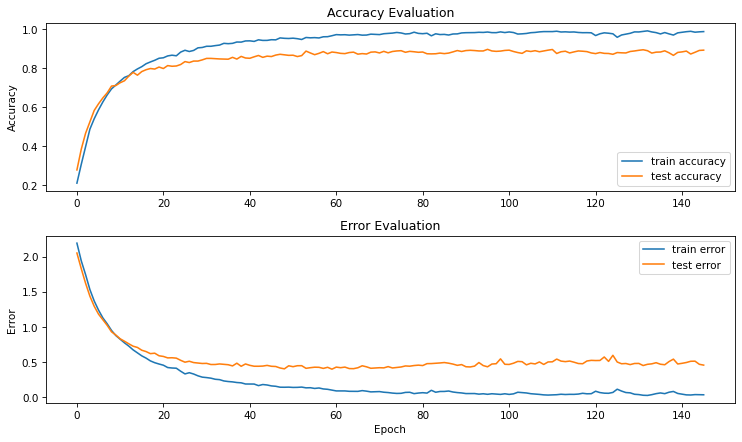


 Plots for Model  2


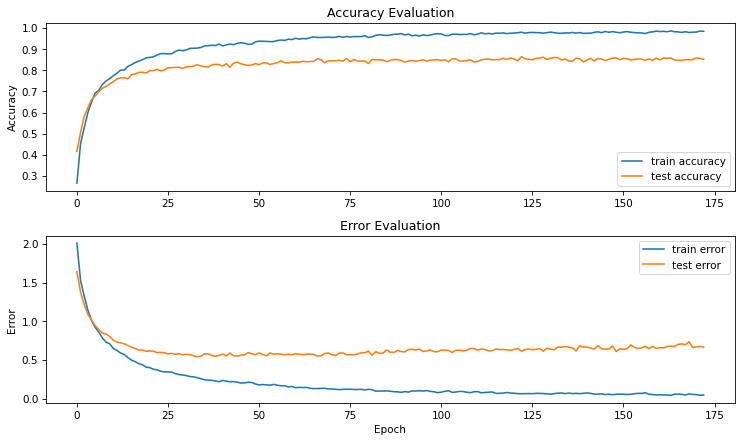


 Plots for Model  3


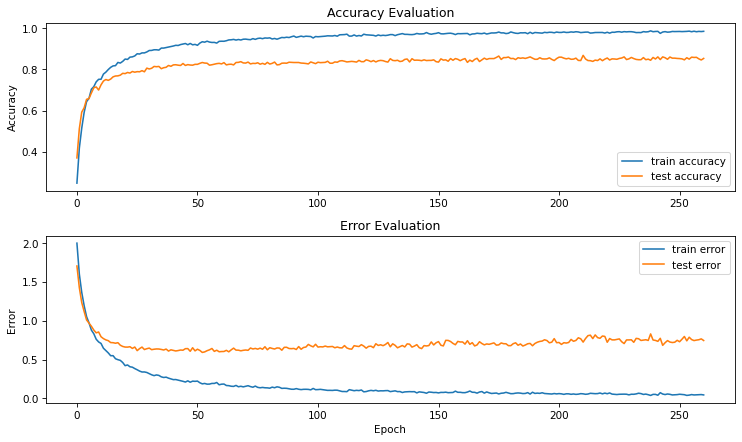


 Plots for Model  4


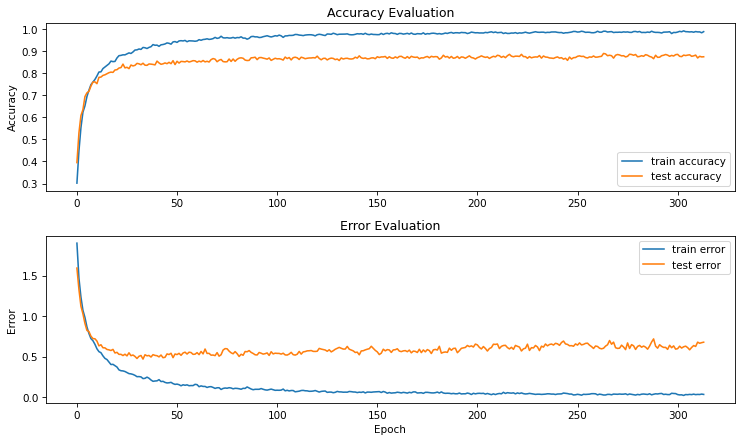


 Plots for Model  5


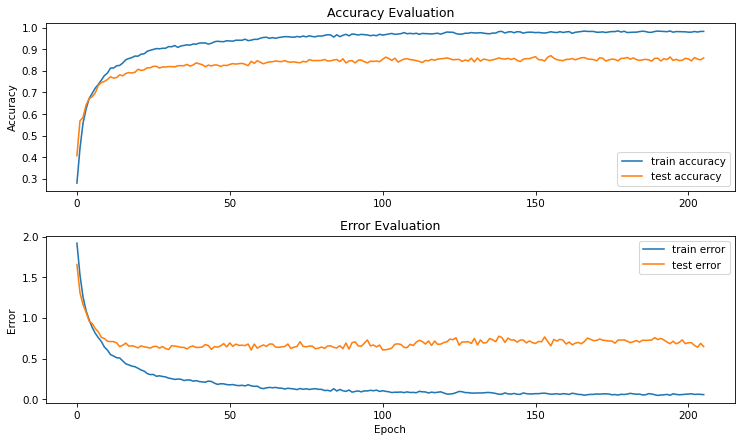


 Plots for Model  6


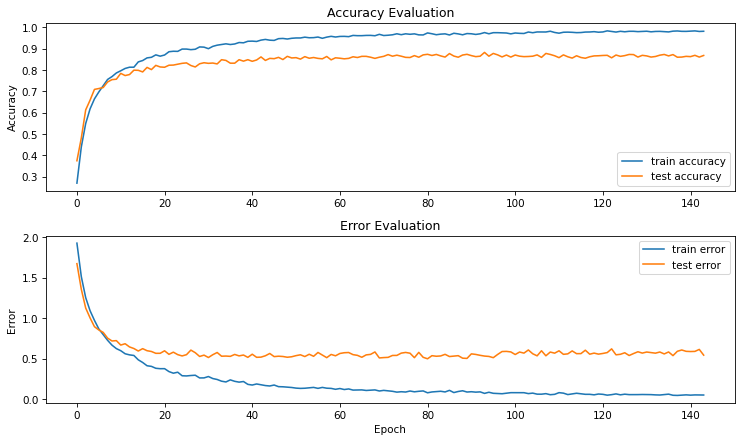

In [10]:
model.plot_all_histories()

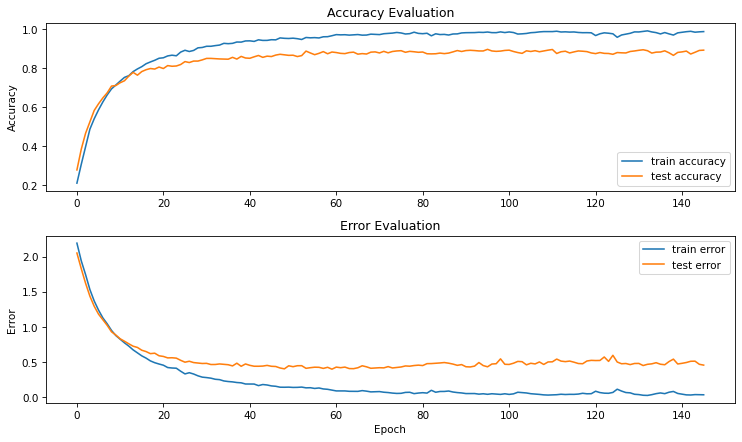

In [11]:
model.plot_history(which_model=1)  # BEST MODEL

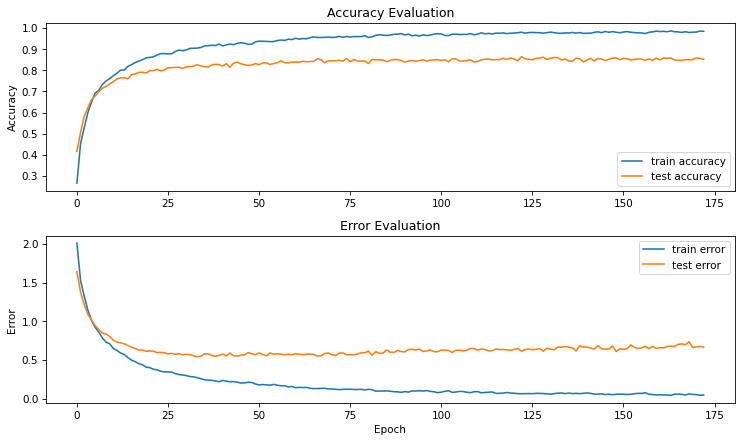

In [12]:
model.plot_history(which_model=2)

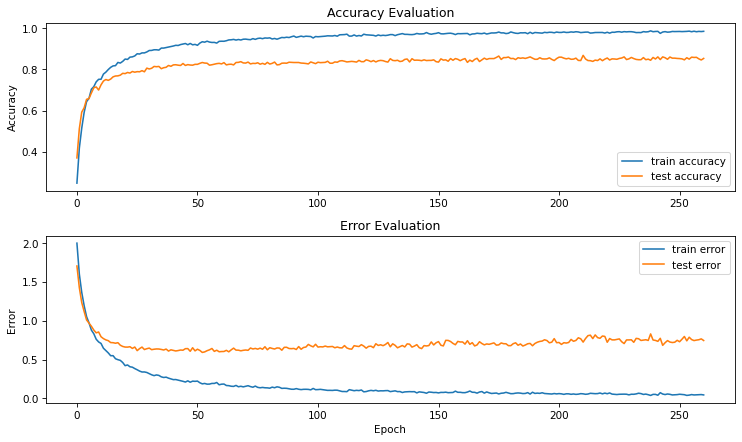

In [13]:
model.plot_history(which_model=3)

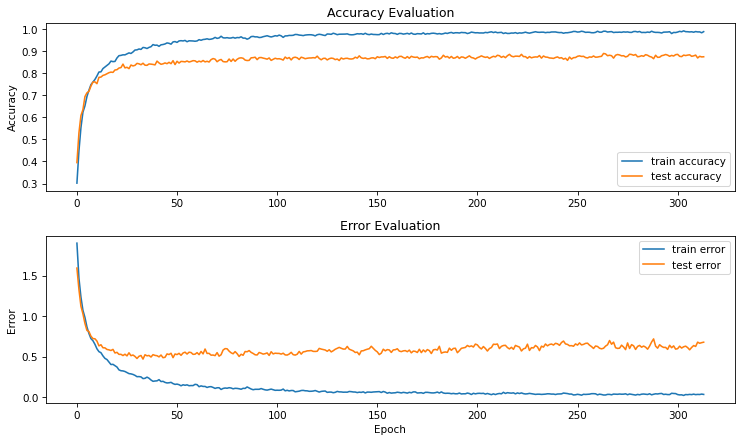

In [14]:
model.plot_history(which_model=4)

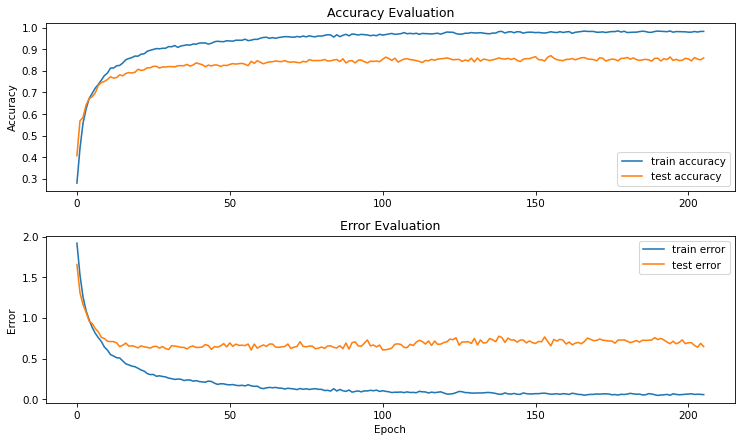

In [15]:
model.plot_history(which_model=5)

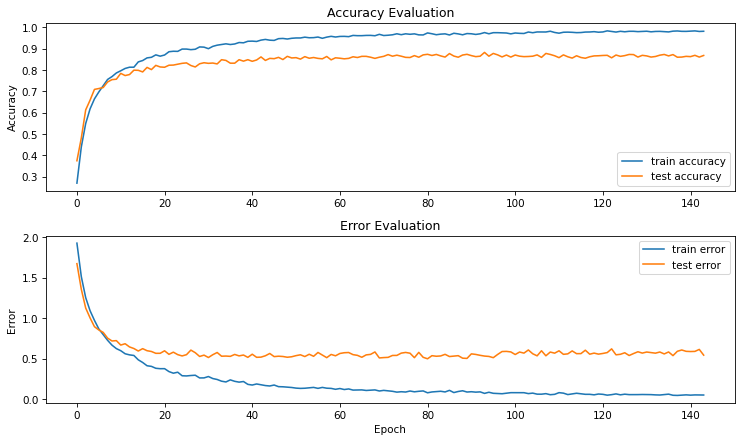

In [16]:
model.plot_history(which_model=6)

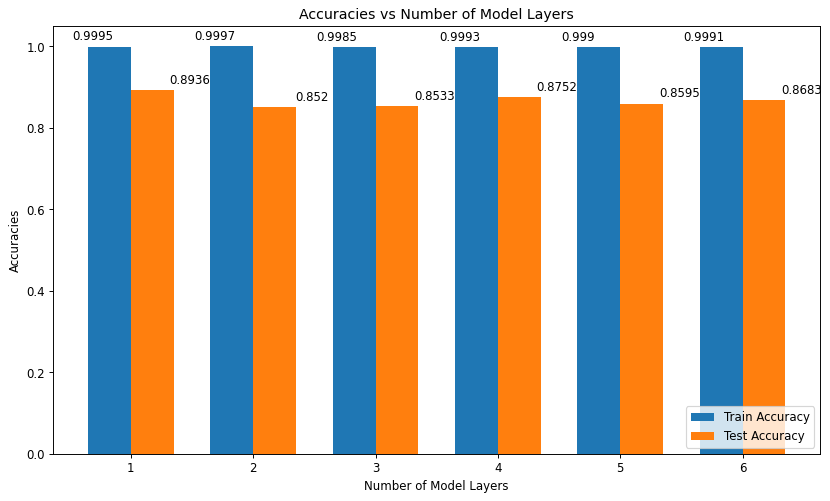

In [17]:
# Plot accuracies vs number of model layers

model.accuracies_vs_models()

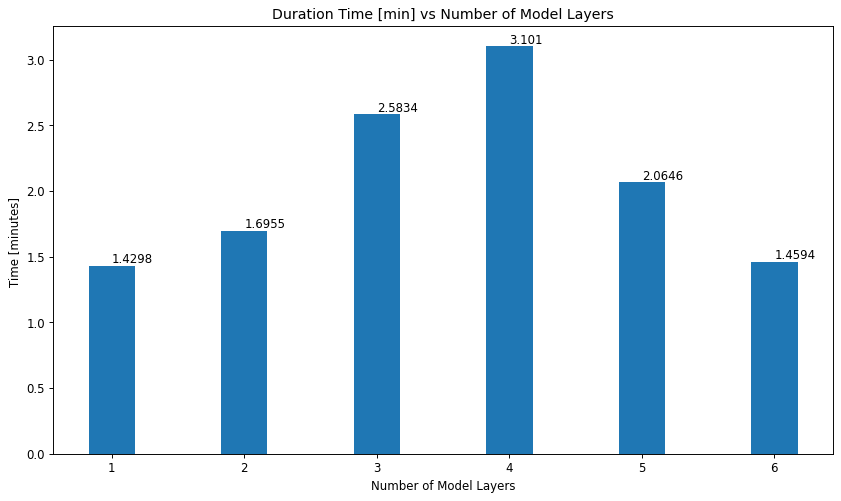

In [18]:
# Plot durations vs number of model layers

model.duration_vs_models()

In [19]:
# Save all generated models

model.save_all_models()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/saved_models_DP_1.0/saved_model_1/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_1.0/saved_model_2/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_1.0/saved_model_3/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_1.0/saved_model_4/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_1.0/saved_model_5/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_1.0/saved_model_6/assets


In [20]:
# Save the best model. change the argument accordingly

model.save_best_model(best_model=1)

INFO:tensorflow:Assets written to: models/saved_models_DP_1.0/best_model/assets


In [27]:
# from keras.models import load_model

In [28]:
# Load back the best model

best_model = load_model("models/saved_models_DP_1.0/best_model")

In [29]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
